In [18]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url = "http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html"

In [3]:
resp = requests.get(url)
resp.raise_for_status()

In [4]:
soup =  BeautifulSoup(resp.text, "lxml")

In [15]:
data = soup.find_all("td")
column = ["Height(Inches)","Weight(Pounds)"]
index = list(range(1,25001))
arr = np.zeros(50000)

di = 0
for i in range(3,len(data)):
    if i % 3 == 0:
        pass
    else:
        arr[di] = float(data[i].text)
        di += 1

arr = arr.reshape(25000,2)
df = pd.DataFrame(arr, index = index, columns = column)

75003


In [16]:
df

,Height(Inches),Weight(Pounds)
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655
24999,67.52918,132.2682


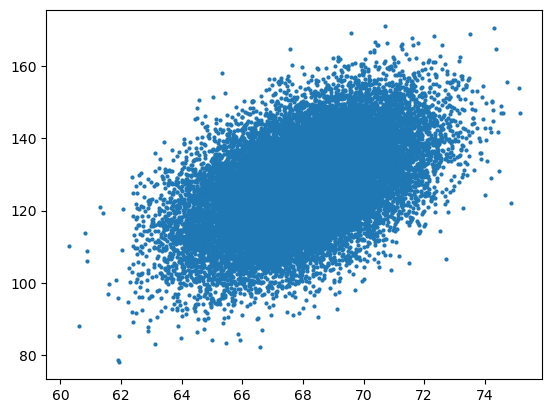

In [24]:
x = df["Height(Inches)"]
y = df["Weight(Pounds)"]
plt.scatter(x,y,s =4)
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression

In [27]:
line_filter = LinearRegression()
line_filter.fit(x.values.reshape(-1,1), y)

LinearRegression()

In [28]:
line_filter.predict([[70]])

array([133.26760811])

In [30]:
line_filter.coef_

array([3.08347645])

In [31]:
line_filter.intercept_

-82.57574306454079

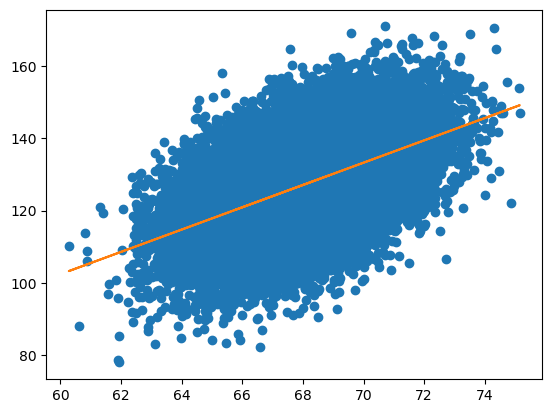

In [32]:
plt.plot(x,y, 'o')
plt.plot(x,line_filter.predict(x.values.reshape(-1,1)))
plt.show()

In [33]:
line_filter.predict([[68]])

array([127.10065522])